
# Project: EDA of IMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [25]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import csv # read and write csv files
from datetime import datetime # operations to parse dates
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('tmdb-movies.csv', encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [3]:
df.shape

(10866, 21)

The dataset has 10,866 movie records and 21 features.


In [4]:
sum(df.duplicated())

1

In [5]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning: Droping unwanted columns off our dataset

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['imdb_id'],axis=1,inplace=True)
df.drop(['homepage'],axis=1,inplace=True)
df.drop(['tagline'],axis=1,inplace=True)
df.drop(['overview'],axis=1,inplace=True)
df.drop(['keywords'],axis=1,inplace=True)
df.drop(['release_date'],axis=1,inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
# save new clean datasets for next section
df.to_csv('data-imdb.csv', index=False)

In [9]:
def datasplit(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.
    """
    indices = list()
    values_new = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indices.append(i)
            values_new.append(presplit)
        for value in values:
            indices.append(i)
            values_new.append(value.strip())
    new_df = df.iloc[indices, :].copy()
    new_df[column] = values_new
    return new_df

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 : Relation of budgets, revenues to popularity
    It is evident that popular movies yeild a lot of revenue as crowds flock to watch them, but how are budgets related to popularity, can low budget films be popular and yeild a revenue on par with the high-end ones. Lets find out!!


In [10]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_imdb = pd.read_csv('data-imdb.csv')
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10865 entries, 0 to 10864
Data columns (total 15 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.2+ MB


id              557
popularity      557
revenue         557
runtime         557
vote_count      557
vote_average    557
release_year    557
budget_adj      557
revenue_adj     557
dtype: int64


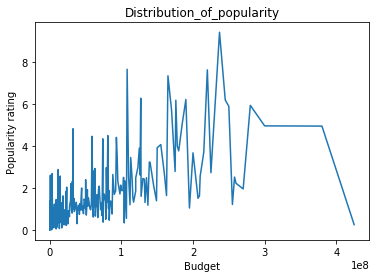

In [30]:
df_budget = df_imdb.groupby('budget').mean()
print (df_budget.count())

plt.plot(df_budget['popularity'])
plt.title('Distribution_of_popularity')
plt.xlabel('Budget')
plt.ylabel('Popularity rating')
plt.show()


The line grpah produced is depicting that the films with lesser budgets are not as popular as the higher ones. Therefore budgets and cost of making result in high qulaity films which then leads to higher popularity.

id              4702
popularity      4702
budget          4702
runtime         4702
vote_count      4702
vote_average    4702
release_year    4702
budget_adj      4702
revenue_adj     4702
dtype: int64


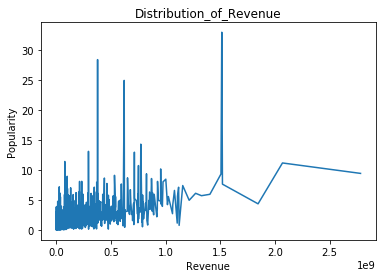

In [32]:
df_budget = df_imdb.groupby('revenue').mean()
print (df_budget.count())

plt.plot(df_budget['popularity'])
plt.title('Distribution_of_Revenue')
plt.xlabel('Revenue')
plt.ylabel('Popularity')
plt.show()

The line grpah produced is depicting that the films with lesser Revenues are not as popular as the higher ones. Therefore popularity directly affects revenues or it is the vice versa.

### Research Question 2 : Successful list of Directors

                Aim is to find the successful list of directors in the given dataset, and to visualize their revenues using a pie chart.

In [12]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_revenue = df[(df['budget_adj'] > 0) & (df['revenue_adj'] > 0)]

df_revenue_director = datasplit(df_revenue, 'director', sep='|')

In [13]:
df_revenue_director_sum = df_revenue_director.groupby('director').agg({'revenue_adj':'sum', 'id':'count'}).rename(columns={'id':'num_films'}).sort_values(by='revenue_adj', ascending=False)
df_revenue_director_sum.head(10)

,revenue_adj,num_films
director,,
Steven Spielberg,1.526692e+10,28
James Cameron,7.327221e+09,8
Peter Jackson,7.019848e+09,11
George Lucas,6.313919e+09,6
Robert Zemeckis,5.655648e+09,15
Michael Bay,5.460672e+09,11
Chris Columbus,4.893486e+09,9
Tim Burton,4.660141e+09,17
David Yates,4.177455e+09,4


C:\Users\JayaBalaji\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


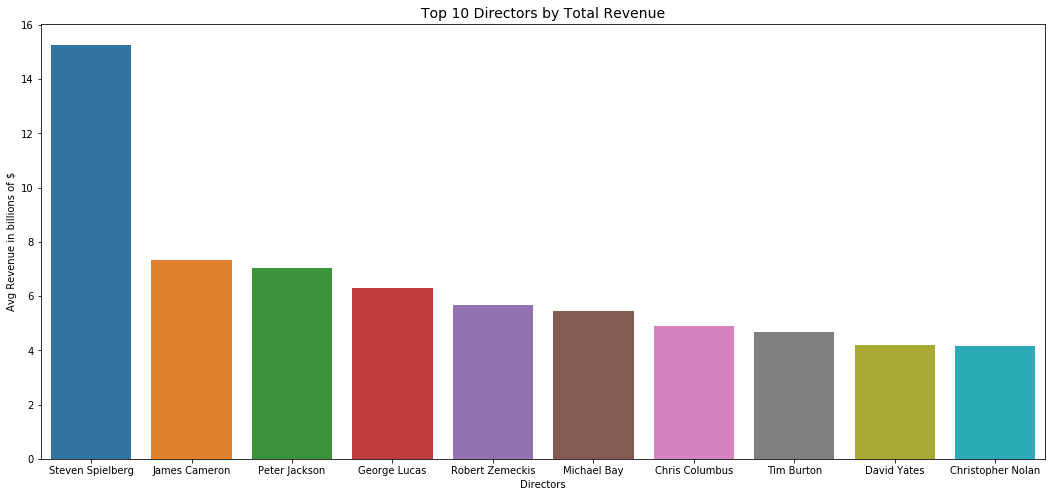

In [33]:
fig, ax = pyplot.subplots(figsize=(18,8))

plt = sns.barplot(ax=ax, data=df_revenue_director_sum.head(10).reset_index(), x="director", y="revenue_adj")
plt.set_xlabel("Directors");
plt.set_ylabel("Avg Revenue in billions of $");
plt.set_title("Top 10 Directors by Total Revenue", fontsize=14);
plt.set_yticklabels((plt.get_yticks()/1000000000).astype(int));

<a id='conclusions'></a>
## Conclusions




FINDINGS:   1)Relation of budgets, revenues to popularity:
                 a)The films with lesser budgets are not as popular as the higher ones. Therefore budgets and cost of making result in high qulaity films which then leads to higher popularity.
                 b)The films with lesser Revenues are not as popular as the higher ones. Therefore popularity directly affects revenues or it is the vice versa.
             2)Successful List of Directors:
                 A Barplot has been plotted for the top 10 Successful list if directors in the Analysis
 
LIMITATIONS: 1) The revenue and budget column's data for quiet a few number of rows have been entered '0'. These data may not affect the EDA, but with them, a more exact prediction could be returned.
             2) It is also not known how the popularity for the movies were given. It could have been after the release or befor ethe release, which might affect the revenue analysis.

    
FUTURE WORKS: If the dataset were to be completely clean, more deeper insights could be given and predictions can be made more accurate.


In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0